
<table>
    <tr>
        <td><img src = "https://cdn.pixabay.com/photo/2020/06/06/06/58/new-york-5265458_960_720.jpg" width = 670></td>
        <td><img src = "https://cdn.pixabay.com/photo/2012/02/25/19/06/downtown-16916__340.jpg" width = 600></td>
    </tr>     
</table>



# Similarity and dissimilarity between downtown New York (Manhattan) and downtown Toronto cities

## Business understanding

Manhattan is the most densely populated of New York City’s 5 boroughs. It's mostly made up of Manhattan Island, bounded by the Hudson, East and Harlem rivers. Among the world’s major commercial, financial and cultural centers, it’s the heart of “the Big Apple.” Its iconic sites include skyscrapers such as the Empire State Building, neon-lit Times Square and the theaters of Broadway. Downtown Toronto is a buzzing area filled with skyscrapers, restaurants, nightlife, and an eclectic mix of neighbourhoods. It’s also home to iconic attractions like the CN Tower, St. Lawrence Market, and the Royal Ontario Museum, with exhibits on natural history. Bloor Street is an upscale shopping area, and the Eaton Centre is a huge, multistory mall. On the lake, the Harbourfront area has parks and cultural venues. Lower Manhattan, also known as Downtown Manhattan or Downtown New York, is the southernmost part of Manhattan, the central borough for business, culture, and government in New York City. What can be the similarity and the dissimilarity between the neighborhoods of the two boroughs: Manhattan and Downtown Toronto? Is Downtown Toronto more like Downtown New York?

## Interest

Since this report will include information about foursquare location on Toronto and New York cities, the study will interest the mayors of both cities to help them evaluate the downtowns’ organization. Indeed it will allow them to open objective discussion and to take informed decisions for the cities infrastructures. The study will also serve as an accessible reference for the entrepreneurs of both cities to develop some areas of business which are showing dissimilarity.

## Data description

New York dataset exists and is accessible at the link: https://geo.nyu.edu/catalog/nyu_2451_34572. The dataset has four columns which are:'Borough', 'Neighborhood', 'Latitude', 'Longitude'.New York Neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segment the neighborhoods and explore them specially Manhattan borough, I will extract data on Manhattan Borough.

To retrieve Toronto dataset I will scrape the the Wikipedia page https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M and parse HTML code using the Python package pandas, and convert data into a pandas dataframe. This first part of the data contains 180 records with 2 columns: 'Postal Code' and 'Neighbourhood'. I will merge it with coordonnate data containning longitude and latitude at the link:'https://cocl.us/Geospatial_data' using 'Postal Code' as the key to join both dataframe into one. Not assigned Borough Will be removed and not assigned Neighborhoods will be replaced by the assigned borough. In order to segment the neighborhoods and explore them specially Downtown Toronto borough, I will extract data on that specific Borough.

I will use the Foursquare API to explore neighborhoods in Both cities. I will use the explore function to get the most common venue categories in each neighborhood, and then use this feature to group the neighborhoods into clusters. I will use the k-means clustering algorithm to complete the comparison between Manhattan and Downtown Toronto. Finally, I will use the Folium library to visualize the neighborhoods in both cities and their emerging clusters.


#### Required Tools
* API FourSquare to explore neighborhoods
* Folium for mapping
* Geocoders library convert an address into latitude and longitude values
* Requests library to handle API request URL

## Analytic approach

Since the business problem has been clearly stated, the analytic approach step entails expressing the problem in the context of statistical and machine-learning techniques, so that the entity or stakeholders with the problem can identify the most suitable techniques for the desired outcome.
In this case study according to the goal, it is a clustering problem. The suitable model for the geographical data will be k-means. 
Criteria for data requirements: data selected should be New York and Toronto geographical data.

### How data will be used to solve the problem.
-	Data will help to analyse and build the model.  We need extensive data of different neighborhoods.
-	The machine learning model should be able to predict the clusters similarity
-	To build a good model, the dataset should be rich and contain many observations (rows) and various neighborhoods.

#### Here are the steps that we will follow:
-	Data wrangling: to identify and handle missing value or not assigned boroughs or Neighborhoods, to standardize and normalize the data. 
-	Data exploratory by analyzing neighborhoods using visualization, descriptive statistical analysis
-	Model development: k-means will be developed to predict the clusters. A Model will help to understand the exact relationship both cities.


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1.  <a href="#item1">Download and Explore Dataset</a>
2.  <a href="#item2">Explore Neighborhoods in Manhattan vs Downtown Toronto</a>
3.  <a href="#item3">Analyze Neighborhood in Manhattan vs Downtown Toronto</a>
4.  <a href="#item4">Cluster Neighborhoods in Manhattan vs Downtown Toronto</a>

</font>

</div>

#### Download all the dependencies.


In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
!conda install -c conda-forge geocoder --yes
import geocoder
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge BeautifulSoup4 --yes
from bs4 import BeautifulSoup

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


<a id='item1'></a>


## 1. Download and Explore Datasets


### 1.1 New York
New York Neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segment the neighborhoods and explore them specially Manhattan borough, I will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood. 

New York dataset exists and is accessible at the link: [https://geo.nyu.edu/catalog/nyu_2451_34572](https://geo.nyu.edu/catalog/nyu_2451_34572?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork-21253531&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork-21253531&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)


In [2]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


#### Load and explore New York's data


In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

Notice how all the relevant data is in the _features_ key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.


In [4]:
neighborhoods_data = newyork_data['features']

Let's take a look at the first item in this list.


In [5]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

#### Let's tranform the data of nested Python dictionaries into a _pandas_ dataframe.


In [6]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

Take a look at the empty dataframe to confirm that the columns are as intended.


In [7]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


Then let's loop through the data and fill the dataframe one row at a time.


In [8]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

Quickly examine the resulting dataframe.


In [9]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


The dataset has all 5 boroughs and 306 neighborhoods.


In [10]:
print("New York's dataframe has {} boroughs and {} neighborhoods.".format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

New York's dataframe has 5 boroughs and 306 neighborhoods.


In [11]:
neigh = neighborhoods['Borough'].value_counts()

neigh= neigh.to_frame('Neighborhoodcount')
neigh

,Neighborhoodcount
Queens,81
Brooklyn,70
Staten Island,63
Bronx,52
Manhattan,40


Text(0.5, 1.0, 'Repartition of the Number of Neighborhoods by Borough')

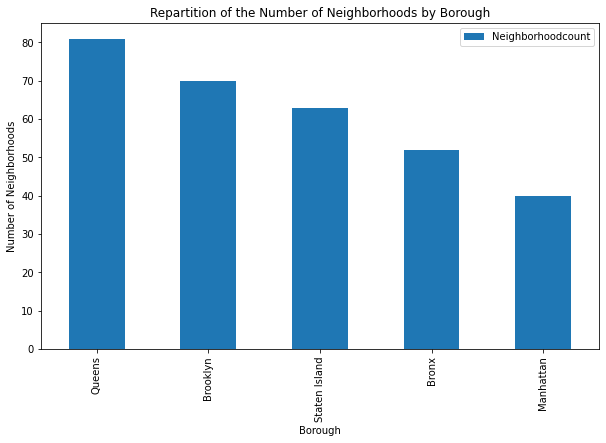

In [12]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

neigh.plot(kind='bar', figsize=(10, 6))
    
plt.xlabel('Borough')
plt.ylabel('Number of Neighborhoods')
plt.title('Repartition of the Number of Neighborhoods by Borough')



#### Use geopy library to get the latitude and longitude values of New York City.


In order to define an instance of the geocoder, let's define a user_agent. The name of the agent is <em>ny_explorer</em>, as shown below.


In [97]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with neighborhoods superimposed on top.

In [98]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

For the capstone purposes, let's simplify the above map and segment and cluster only the neighborhoods in Manhattan. So let's slice the original dataframe and create a new dataframe of the Manhattan data.

In [99]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


Let's get the geographical coordinates of Manhattan.


In [100]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


As we did with all of New York City, let's visualizat Manhattan the neighborhoods in it.

In [101]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

### 1.2 Download and explore Toronto dataset

In [102]:
#!conda install -c conda-forge html5lib  --yes

# website url
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

# Extract table data
dft = pd.read_html(url,flavor='html5lib')

# Get first table                                                                                                           
df = dft[0]

# Extract columns  PostalCode, Borough, and Neighborhood                                                                                                           
df2 = df[['Postal Code','Borough', 'Neighbourhood']]

# Rename columns 
df2.rename(columns={'Postal Code': 'PostalCode', 'Neighbourhood': 'Neighborhood'}, inplace=True)

# Print data shape
print('Dataframe shape is:', df2.shape)

# Print first data
df2.head(12)

Dataframe shape is: (180, 3)


,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


#### Ignore cells with a borough that is Not assigned.

In [103]:
# is_notassigned is a boolean variable with True or False in it
is_notassigned = df2 ['Borough'] != 'Not assigned'

# Extract lines with assigned Borough
df_assigned = df2[is_notassigned].reset_index(drop=True)

print("Dataframe shape after dealing with not assigned borough  is:", df_assigned.shape)

#df_assigned
df_assigned.head(12)

Dataframe shape after dealing with not assigned borough  is: (103, 3)


,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


#### Replace not assigned Neighborhood by Borough in Toronto City

In [104]:
# Identify not assigned Neighborough
is_notassigned_ngbhd = df_assigned.loc[(df_assigned.Neighborhood == 'Not assigned')]

# Count not assigned Neighborough
print ("The number of the not assigned Neighborhood in Toronto city is: ", len(is_notassigned_ngbhd) )


# Replace not assigned Neighborhood by Borough
df_assigned.loc[(df_assigned.Neighborhood == 'Not assigned'), ['Neighborhood']] = df_assigned.Borough

The number of the not assigned Neighborhood in Toronto city is:  0


In [105]:
# Shape the dataframe
print("The shape of Toronto's city dataframe is: ", df_assigned.shape )

The shape of Toronto's city dataframe is:  (103, 3)


In [106]:
neigh_t = df_assigned['Borough'].value_counts()

neigh_t= neigh_t.to_frame('Neighborhoodcount')
neigh_t

,Neighborhoodcount
North York,24
Downtown Toronto,19
Scarborough,17
Etobicoke,12
Central Toronto,9
West Toronto,6
York,5
East York,5
East Toronto,5
Mississauga,1


Text(0.5, 1.0, 'Repartition of the Number of Neighborhoods by Borough')

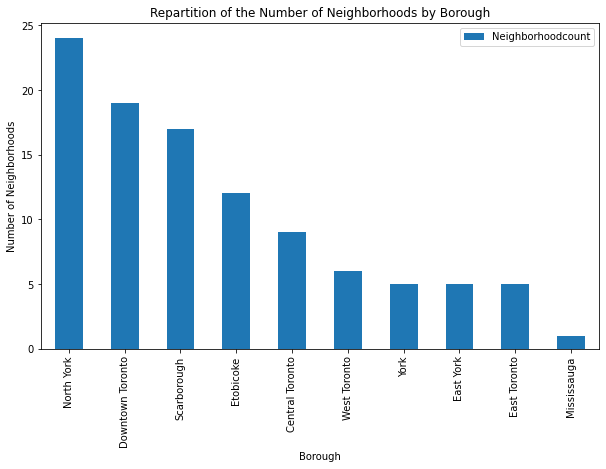

In [107]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

neigh_t.plot(kind='bar', figsize=(10, 6))
    
plt.xlabel('Borough')
plt.ylabel('Number of Neighborhoods')
plt.title('Repartition of the Number of Neighborhoods by Borough')

#### Let's Create a dataframe with longitude and latitude added

In [108]:
'''

# Method 1

#import geocoder # import geocoder

def get_lats_longs(df): 

    lat_lng_coords = None
    # create lists to store our new lats and longs
    lats = []
    longs=[]
    #loop through our dataframe and look up the lat/long of each postal code
    for index, row in df.iterrows():
        postal_code=row[0]
        # loop until you get the coordinates
        lat_lng_coords = None
        while(lat_lng_coords is None):
            g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
            lat_lng_coords = g.latlng

        lats.append(lat_lng_coords[0])
        longs.append(lat_lng_coords[1])

    df['Latitude'] = lats
    df['Longitude'] = longs
    return df
'''

# Method 2

# url for longitude and latitude reference file
url = 'https://cocl.us/Geospatial_data'
 
# read csv file    
df_longlat = pd.read_csv(url)
print("longitude and latitude dataframe columns are:", df_longlat.columns)

# Rename columns 
df_longlat.rename(columns={'Postal Code': 'PostalCode'}, inplace=True)

# join longlat dataframe and neighborhood dataframe
neighborhoods_T = pd.merge(df_assigned, df_longlat)

#print head data
neighborhoods_T.head(12)

longitude and latitude dataframe columns are: Index(['Postal Code', 'Latitude', 'Longitude'], dtype='object')


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [109]:
#df_assigned= get_lats_longs(df_assigned)

In [110]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="t_explorer")
location = geolocator.geocode(address)
latitude_t = location.latitude
longitude_t = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude_t, longitude_t))

The geograpical coordinate of Manhattan are 43.6534817, -79.3839347.


In [111]:
# create map of New York using latitude and longitude values
map_t = folium.Map(location=[latitude_t, longitude_t], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods_T['Latitude'], neighborhoods_T['Longitude'], neighborhoods_T['Borough'], neighborhoods_T['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_t)  
    
map_t

Let's now explore the map for Downtown Toronto

In [112]:
toronto_data = neighborhoods_T[neighborhoods_T['Borough']== 'Downtown Toronto'].reset_index(drop=True)
toronto_data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


In [113]:
address = 'Downtown Toronto, Ontario'

geolocator = Nominatim(user_agent="dt_explorer")
location = geolocator.geocode(address)
latitude_t = location.latitude
longitude_t = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude_t, longitude_t))

The geograpical coordinate of Manhattan are 43.6563221, -79.3809161.


In [114]:
# create map of Manhattan using latitude and longitude values
map_toronto = folium.Map(location=[latitude_t, longitude_t], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [115]:
# Shape the dataframe
print("The shape of the dataframe is: ", neighborhoods_T.shape )

The shape of the dataframe is:  (103, 5)


#### Let's now explore the Manhattan and Toronto's neighborhoods.


<a id='item2'></a>
## 2. Explore Neighborhoods in Manhattan vs Downtown Toronto 

### 2.1 Explore Neighborhoods in Manhattan

 to start utilizing the Foursquare API to explore the neighborhoods.


#### Define Foursquare Credentials and Version


In [116]:
CLIENT_ID = 'SGT0HW1NDALDIQ55U1C5WKFDV1JH4A5AJWPHMHW5GGLXATVF' # your Foursquare ID
CLIENT_SECRET = 'D3GLEIDOFCTPXMI41N0VBPNTZZHFZQZVYV5O1U0QLD4G1QCN' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SGT0HW1NDALDIQ55U1C5WKFDV1JH4A5AJWPHMHW5GGLXATVF
CLIENT_SECRET:D3GLEIDOFCTPXMI41N0VBPNTZZHFZQZVYV5O1U0QLD4G1QCN


### 2.1 Explore Neighborhoods in Downtown New York (Manhattan)

#### Let's create a function using Foursquare to retrieve all the neighborhoods in Manhattan


In [117]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now let's run the above function on each neighborhood and create a new dataframe called _manhattan_venues_.


In [118]:
# type your answer here
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


#### Let's check the size of the resulting dataframe


In [119]:
print("Shape of Manhattan venues", manhattan_venues.shape)
manhattan_venues.head()

Shape of Manhattan venues (3209, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
1,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop


#### There are 3211 venues at Downtown New York (Manhattan)

Let's check how many venues were returned for each neighborhood of Manhattan.


In [120]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,66,66,66,66,66,66
Carnegie Hill,89,89,89,89,89,89
Central Harlem,45,45,45,45,45,45
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,40,40,40,40,40,40
East Village,100,100,100,100,100,100


#### Let's find out how many unique categories can be curated from all the returned venues of Manhattan

In [121]:
print('There are {} unique categories in Downtown New York.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 321 unique categories in Downtown New York.


### 2.2 Explore Neighborhoods in Downtown Toronto

In [122]:
toronto_data = neighborhoods_T[neighborhoods_T['Borough']== 'Downtown Toronto'].reset_index(drop=True)
toronto_data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


#### Retrieve each neighborhood and create a new dataframe called toronto_venues.

In [123]:

toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Stn A PO Boxes
St. James Town, Cabbagetown
First Canadian Place, Underground city
Church and Wellesley


#### Let's check the size of the resulting dataframe

In [124]:
print(toronto_venues.shape)
toronto_venues.head()

(1248, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant


#### There are 1248 venues at Downtown Toronto while there are 3211 venues New York (Manhattan)

#### Let's check how many venues were returned for each neighborhood at Downtown Toronton

In [125]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,55,55,55,55,55,55
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",16,16,16,16,16,16
Central Bay Street,68,68,68,68,68,68
Christie,16,16,16,16,16,16
Church and Wellesley,75,75,75,75,75,75
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
"First Canadian Place, Underground city",100,100,100,100,100,100
"Garden District, Ryerson",100,100,100,100,100,100
"Harbourfront East, Union Station, Toronto Islands",100,100,100,100,100,100


#### Let's find out how many unique categories can be curated from all the returned venues

In [126]:

print('There are {} uniques categories in Downtown Toronto.'.format(len(toronto_venues['Venue Category'].unique())))

There are 213 uniques categories in Downtown Toronto.


#### There are 213 uniques categories in Downtown Toronto and 321 uniques categories in Downtown New York (Manhattan).

<a id='item3'></a>
# 3. Analyze Each Neighborhood in Manhattan vs Downtown Toronto

## 3.1 Analyze Each Neighborhood in Manhattan

In [127]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soba Restaurant,Soccer Field,Social Club,Soup Place,South American Restaurant,South Indian Restaurant,Southern / Soul Foo

And let's examine the new dataframe size.

In [128]:
manhattan_onehot.shape

(3209, 322)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [129]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soba Restaurant,Soccer Field,Social Club,Soup Place,South American Restaurant,South Indian Restaurant,Southern / Soul Foo

Let's confirm the new size

In [130]:
manhattan_grouped.shape

(40, 322)

#### Let's print each neighborhood along with the top 5 most common venues

In [131]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
           venue  freq
0           Park  0.09
1          Hotel  0.08
2            Gym  0.06
3    Coffee Shop  0.06
4  Memorial Site  0.05


----Carnegie Hill----
         venue  freq
0  Coffee Shop  0.09
1         Café  0.04
2  Yoga Studio  0.03
3    Wine Shop  0.03
4  Pizza Place  0.03


----Central Harlem----
                 venue  freq
0   African Restaurant  0.07
1   Seafood Restaurant  0.04
2    French Restaurant  0.04
3  American Restaurant  0.04
4                  Bar  0.04


----Chelsea----
                 venue  freq
0          Coffee Shop  0.10
1          Art Gallery  0.05
2  American Restaurant  0.04
3               Bakery  0.04
4   Italian Restaurant  0.03


----Chinatown----
                 venue  freq
0   Chinese Restaurant  0.09
1               Bakery  0.06
2         Cocktail Bar  0.05
3         Dessert Shop  0.04
4  American Restaurant  0.04


----Civic Center----
                  venue  freq
0           Coffee Shop  0.05
1                 

Let's put that into a pandas dataframe
First, let's write a function to sort the venues in descending order.

In [132]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [133]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Hotel,Coffee Shop,Gym,Memorial Site,Shopping Mall,Food Court,Clothing Store,Gourmet Shop,Boat or Ferry
1,Carnegie Hill,Coffee Shop,Café,Yoga Studio,Wine Shop,Italian Restaurant,Gym / Fitness Center,Gym,French Restaurant,Pizza Place,Bookstore
2,Central Harlem,African Restaurant,Cosmetics Shop,French Restaurant,American Restaurant,Bar,Seafood Restaurant,Chinese Restaurant,Salon / Barbershop,Coffee Shop,Cocktail Bar
3,Chelsea,Coffee Shop,Art Gallery,Bakery,American Restaurant,Italian Restaurant,Ice Cream Shop,Cycle Studio,Cupcake Shop,Café,Market
4,Chinatown,Chinese Restaurant,Bakery,Cocktail Bar,American Restaurant,Dessert Shop,Noodle House,Salon / Barbershop,Optical Shop,Spa,Hotpot Restaurant
5,Civic Center,Spa,Gym / Fitness Center,Coffee Shop,Hotel,French Restaurant,Cocktail Bar,Yoga Studio,American Restaurant,Sushi Restaurant,Park
6,Clinton,Theater,American Restaurant,Gym / Fitness Center,Coffee Shop,Cocktail Bar,Gym,Spa,Sandwich Place,Hotel,Italian Restaurant
7,East Harlem,Mexican Restaurant,Bakery,Thai Restaurant,Deli / Bodega,Sandwich Place,Latin American Restaurant,French Restaurant,Gym,Grocery Store,Taco Place
8,East Village,Bar,Ice Cream Shop,Mexican Restaurant,Coffee Shop,Wine Bar,Cocktail Bar,Pizza Place,Korean Restaurant,Speakeasy,Vegetarian / Vegan Restaurant
9,Financial District,Coffee Shop,Pizza Place,Park,Cocktail Bar,Bar,Gym,Juice Bar,Hotel,Steakhouse,Salad Place


### The most common venue in Manhattan neighborhood is the restaurant

## 3.2 Analyze Each Neighborhood in Downtown Toronto

In [134]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns_t = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns_t]

toronto_onehot.head()

,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Let's examine the new size of the dataframe

In [135]:
toronto_onehot.shape

(1248, 213)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [136]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store
0,Berczy Park,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,0.00,0.018182,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.018182,0.036364,0.000000,0.000000,0.00,0.018182,0.018182,0.000000,0.036364,0.000000,0.000000,0.018182,0.0000,0.000000,0.0000,0.00,0.018182,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.018182,0.000000,0.0000,0.000000,0.036364,0.000000,0.000000,0.000000,0.000000,0.036364,0.090909,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.018182,0.000000,0.018182,0.00,0.000000,0.018182,0.00,0.000000,0.000000,0.018182,0.000000,0.000000,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.036364,0.000000,0.000000,0.018182,0.000000,0.000000,0.000000,0.018182,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.018182,0.018182,0.018182,0.000000,0.000000,0.0000,0.000000,0.000000,0.00,0.000000,0.00,0

Let's print each neighborhood along with the top 5 commun venues

In [137]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
          venue  freq
0   Coffee Shop  0.09
1      Beer Bar  0.04
2        Bakery  0.04
3  Cocktail Bar  0.04
4   Cheese Shop  0.04


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
             venue  freq
0   Airport Lounge  0.12
1  Airport Service  0.12
2      Coffee Shop  0.06
3              Bar  0.06
4    Boat or Ferry  0.06


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.18
1                Café  0.06
2      Sandwich Place  0.04
3  Italian Restaurant  0.04
4     Thai Restaurant  0.03


----Christie----
                venue  freq
0       Grocery Store  0.25
1                Café  0.19
2                Park  0.12
3  Athletics & Sports  0.06
4           Nightclub  0.06


----Church and Wellesley----
                 venue  freq
0          Coffee Shop  0.09
1  Japanese Restaurant  0.05
2     Sushi Restaurant  0.05
3              Gay Bar  0.05
4           Restauran

Let's put that into a pandas dataframe First, let's write a function to sort the venues in descending order.

In [138]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_t = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_t['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted_t.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_t

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Seafood Restaurant,Cocktail Bar,Bakery,Cheese Shop,Beer Bar,Restaurant,Farmers Market,Hotel,Italian Restaurant
1,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Lounge,Airport Service,Boutique,Sculpture Garden,Plane,Rental Car Location,Coffee Shop,Bar,Harbor / Marina,Boat or Ferry
2,Central Bay Street,Coffee Shop,Café,Sandwich Place,Italian Restaurant,Salad Place,Burger Joint,Japanese Restaurant,Department Store,Thai Restaurant,Bubble Tea Shop
3,Christie,Grocery Store,Café,Park,Candy Store,Nightclub,Coffee Shop,Restaurant,Italian Restaurant,Athletics & Sports,Baby Store
4,Church and Wellesley,Coffee Shop,Japanese Restaurant,Gay Bar,Sushi Restaurant,Restaurant,Yoga Studio,Men's Store,Mediterranean Restaurant,Hotel,Pub
5,"Commerce Court, Victoria Hotel",Coffee Shop,Restaurant,Hotel,Café,American Restaurant,Gym,Seafood Restaurant,Deli / Bodega,Japanese Restaurant,Cocktail Bar
6,"First Canadian Place, Underground city",Coffee Shop,Café,Hotel,American Restaurant,Japanese Restaurant,Restaurant,Gym,Seafood Restaurant,Salad Place,Asian Restaurant
7,"Garden District, Ryerson",Clothing Store,Coffee Shop,Café,Bubble Tea Shop,Cosmetics Shop,Japanese Restaurant,Ramen Restaurant,Hotel,Italian Restaurant,Lingerie Store
8,"Harbourfront East, Union Station, Toronto Islands",Coffee Shop,Aquarium,Hotel,Café,Fried Chicken Joint,Restaurant,Brewery,Scenic Lookout,Music Venue,Italian Restaurant
9,"Kensington Market, Chinatown, Grange Park",Mexican Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Bar,Café,Vietnamese Restaurant,Bakery,Dessert Shop,Gaming Cafe,Park


#### The most common venue in Downtown Toronto neighborhood is the Coffee Shop

<a id='item4'></a>
# 4. Cluster Neighborhoods Manhattan vs Downtown Toronto

Run k-means to cluster the neighborhood into 5 clusters.

## 4.1 Cluster Neighborhoods Manhattan

In [139]:

# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 1], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [140]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,4,Sandwich Place,Coffee Shop,Gym,Discount Store,Supplement Shop,Donut Shop,Seafood Restaurant,Tennis Stadium,Pharmacy,Kids Store
1,Manhattan,Chinatown,40.715618,-73.994279,1,Chinese Restaurant,Bakery,Cocktail Bar,American Restaurant,Dessert Shop,Noodle House,Salon / Barbershop,Optical Shop,Spa,Hotpot Restaurant
2,Manhattan,Washington Heights,40.851903,-73.936900,1,Café,Bakery,Mobile Phone Shop,Grocery Store,Deli / Bodega,Coffee Shop,Spanish Restaurant,Supermarket,Supplement Shop,Tapas Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,2,Mexican Restaurant,Café,Restaurant,Lounge,Frozen Yogurt Shop,Bakery,Pizza Place,Park,Chinese Restaurant,Deli / Bodega
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Pizza Place,Coffee Shop,Café,Mexican Restaurant,Yoga Studio,Bakery,Latin American Restaurant,Liquor Store,Park,Deli / Bodega


Finally, let's visualize the resulting clusters

In [141]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 4.2 Examine Manhattan Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.



### Cluster 0

In [142]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Hamilton Heights,Pizza Place,Coffee Shop,Café,Mexican Restaurant,Yoga Studio,Bakery,Latin American Restaurant,Liquor Store,Park,Deli / Bodega
20,Lower East Side,Chinese Restaurant,Pharmacy,Ramen Restaurant,Bakery,Café,Coffee Shop,Art Gallery,Japanese Restaurant,Pizza Place,Performing Arts Venue


#### Cluster 0 is "Pizza place and Chinese Restaurant venues"

### Cluster 1

In [143]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,Bakery,Cocktail Bar,American Restaurant,Dessert Shop,Noodle House,Salon / Barbershop,Optical Shop,Spa,Hotpot Restaurant
2,Washington Heights,Café,Bakery,Mobile Phone Shop,Grocery Store,Deli / Bodega,Coffee Shop,Spanish Restaurant,Supermarket,Supplement Shop,Tapas Restaurant
6,Central Harlem,African Restaurant,Cosmetics Shop,French Restaurant,American Restaurant,Bar,Seafood Restaurant,Chinese Restaurant,Salon / Barbershop,Coffee Shop,Cocktail Bar
8,Upper East Side,Italian Restaurant,Exhibit,Coffee Shop,Bakery,Gym / Fitness Center,Juice Bar,Hotel,Spa,French Restaurant,Cosmetics Shop
9,Yorkville,Italian Restaurant,Bar,Gym,Coffee Shop,Sushi Restaurant,Deli / Bodega,Wine Shop,Diner,Japanese Restaurant,Mexican Restaurant
10,Lenox Hill,Italian Restaurant,Sushi Restaurant,Coffee Shop,Pizza Place,Cocktail Bar,Café,Gym,Gym / Fitness Center,Burger Joint,Playground
11,Roosevelt Island,Deli / Bodega,Plaza,Coffee Shop,Sandwich Place,Gym / Fitness Center,Gym,Dry Cleaner,Greek Restaurant,School,Outdoors & Recreation
12,Upper West Side,Italian Restaurant,Bar,Café,Wine Bar,Indian Restaurant,Bakery,Pizza Place,Coffee Shop,Vegetarian / Vegan Restaurant,Mediterranean Restaurant
13,Lincoln Square,Plaza,Italian Restaurant,Performing Arts Venue,Concert Hall,Café,Theater,Indie Movie Theater,Wine Shop,Gym / Fitness Center,Bakery
14,Clinton,Theater,American Restaurant,Gym / Fitness Center,Coffee Shop,Cocktail Bar,Gym,Spa,Sandwich Place,Hotel,Italian Restaurant


#### Cluster 1 is "Restaurant, Hotel, Bar, Park, Spa, Theater and Coffee Shop venues"

### Cluster 2

In [144]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Inwood,Mexican Restaurant,Café,Restaurant,Lounge,Frozen Yogurt Shop,Bakery,Pizza Place,Park,Chinese Restaurant,Deli / Bodega
5,Manhattanville,Seafood Restaurant,Coffee Shop,Deli / Bodega,Italian Restaurant,Mexican Restaurant,Indian Restaurant,Lounge,Boutique,Sushi Restaurant,Supermarket
7,East Harlem,Mexican Restaurant,Bakery,Thai Restaurant,Deli / Bodega,Sandwich Place,Latin American Restaurant,French Restaurant,Gym,Grocery Store,Taco Place
26,Morningside Heights,Park,Bookstore,American Restaurant,Coffee Shop,Café,Deli / Bodega,Burger Joint,Ice Cream Shop,Grocery Store,Tennis Court
36,Tudor City,Park,Café,Mexican Restaurant,Asian Restaurant,Deli / Bodega,Diner,Coffee Shop,Seafood Restaurant,Greek Restaurant,Gym


#### Cluster 2 is "Restaurant and Park venues"

### Cluster 3

In [145]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Stuyvesant Town,Park,Harbor / Marina,Cocktail Bar,Baseball Field,Bar,Gym / Fitness Center,Heliport,Bistro,Farmers Market,Boat or Ferry


#### Cluster 3 is "Park venues"

### Cluster 4

In [146]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Sandwich Place,Coffee Shop,Gym,Discount Store,Supplement Shop,Donut Shop,Seafood Restaurant,Tennis Stadium,Pharmacy,Kids Store


#### Cluster 4 is "Sandwich Place"

## 4.3 Cluster Neighborhoods Downtown Toronto

In [147]:

# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 3, 0, 2, 4, 4, 4, 4, 0, 4], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [148]:
# add clustering labels
neighborhoods_venues_sorted_t.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted_t.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee Shop,Bakery,Pub,Park,Breakfast Spot,Café,Theater,Yoga Studio,Mexican Restaurant,Restaurant
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,Gym,Diner,Restaurant,Portuguese Restaurant,Park,Music Venue,Mexican Restaurant,Italian Restaurant,Hobby Shop
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,4,Clothing Store,Coffee Shop,Café,Bubble Tea Shop,Cosmetics Shop,Japanese Restaurant,Ramen Restaurant,Hotel,Italian Restaurant,Lingerie Store
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,4,Coffee Shop,Café,Cocktail Bar,Restaurant,Gastropub,American Restaurant,Beer Bar,Gym,Seafood Restaurant,Farmers Market
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,4,Coffee Shop,Seafood Restaurant,Cocktail Bar,Bakery,Cheese Shop,Beer Bar,Restaurant,Farmers Market,Hotel,Italian Restaurant


Finally, let's visualize the resulting clusters

In [149]:
# create map
map_clusters = folium.Map(location=[latitude_t, longitude_t], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 4.4 Examine Manhattan Clusters

### Cluster 0

In [150]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,0,Coffee Shop,Bakery,Pub,Park,Breakfast Spot,Café,Theater,Yoga Studio,Mexican Restaurant,Restaurant
1,Downtown Toronto,0,Coffee Shop,Gym,Diner,Restaurant,Portuguese Restaurant,Park,Music Venue,Mexican Restaurant,Italian Restaurant,Hobby Shop
5,Downtown Toronto,0,Coffee Shop,Café,Sandwich Place,Italian Restaurant,Salad Place,Burger Joint,Japanese Restaurant,Department Store,Thai Restaurant,Bubble Tea Shop
8,Downtown Toronto,0,Coffee Shop,Aquarium,Hotel,Café,Fried Chicken Joint,Restaurant,Brewery,Scenic Lookout,Music Venue,Italian Restaurant


#### The Cluster 0 is "Coffee shop venues"

### Cluster 1

In [151]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Downtown Toronto,1,Park,Trail,Playground,Creperie,Doner Restaurant,Dog Run,Distribution Center,Discount Store,Diner,Dim Sum Restaurant


#### The Cluster 1 is "park venues"

### Cluster 2

In [152]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Downtown Toronto,2,Grocery Store,Café,Park,Candy Store,Nightclub,Coffee Shop,Restaurant,Italian Restaurant,Athletics & Sports,Baby Store


#### The Cluster 2 is "Grocery Store venues"

### Cluster 3

In [153]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Downtown Toronto,3,Airport Lounge,Airport Service,Boutique,Sculpture Garden,Plane,Rental Car Location,Coffee Shop,Bar,Harbor / Marina,Boat or Ferry


#### The Cluster 3 is "Airport Lounge venues"

### Cluster 4

In [154]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Downtown Toronto,4,Clothing Store,Coffee Shop,Café,Bubble Tea Shop,Cosmetics Shop,Japanese Restaurant,Ramen Restaurant,Hotel,Italian Restaurant,Lingerie Store
3,Downtown Toronto,4,Coffee Shop,Café,Cocktail Bar,Restaurant,Gastropub,American Restaurant,Beer Bar,Gym,Seafood Restaurant,Farmers Market
4,Downtown Toronto,4,Coffee Shop,Seafood Restaurant,Cocktail Bar,Bakery,Cheese Shop,Beer Bar,Restaurant,Farmers Market,Hotel,Italian Restaurant
7,Downtown Toronto,4,Coffee Shop,Café,Gym,Restaurant,Hotel,Bar,Thai Restaurant,Clothing Store,Sushi Restaurant,Juice Bar
9,Downtown Toronto,4,Coffee Shop,Hotel,Restaurant,Café,Salad Place,Seafood Restaurant,American Restaurant,Japanese Restaurant,Italian Restaurant,Bar
10,Downtown Toronto,4,Coffee Shop,Restaurant,Hotel,Café,American Restaurant,Gym,Seafood Restaurant,Deli / Bodega,Japanese Restaurant,Cocktail Bar
11,Downtown Toronto,4,Café,Bookstore,Sandwich Place,Bar,Bakery,Japanese Restaurant,Pub,Bank,Dessert Shop,Restaurant
12,Downtown Toronto,4,Mexican Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Bar,Café,Vietnamese Restaurant,Bakery,Dessert Shop,Gaming Cafe,Park
15,Downtown Toronto,4,Coffee Shop,Italian Restaurant,Pub,Japanese Restaurant,Restaurant,Hotel,Beer Bar,Seafood Restaurant,Café,Gym
16,Downtown Toronto,4,Coffee Shop,Café,Pizza Place,Restaurant,Pub,Chinese Restaurant,Market,Bakery,Park,Italian Restaurant


#### The Cluster 4 is "Coffee Shop, café, Mexican Restaurant & Clothing Store venues"

## Thanks!
